In [5]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from news_tweets_analysis.data import load_tweet_eval
from news_tweets_analysis.preprocessing import TextPreprocessor

%load_ext autoreload
%autoreload 2

In [2]:
sns.set_theme()

In [6]:
tweets = load_tweet_eval()
tweets['label'] = tweets['label'].replace({
    0: 'negative', 1: 'neutral', 2: 'positive'
})
tweets.head()

Found cached dataset tweet_eval (/Users/imilyutin/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)
100%|██████████| 3/3 [00:00<00:00, 107.99it/s]


,text,label,split
0,"""QT @user In the original draft of the 7th boo...",positive,train
1,"""Ben Smith / Smith (concussion) remains out of...",neutral,train
2,Sorry bout the stream last night I crashed out...,neutral,train
3,Chase Headley's RBI double in the 8th inning o...,neutral,train
4,@user Alciato: Bee will invest 150 million in ...,positive,train


In [11]:
import numpy as np
from sklearn.model_selection import PredefinedSplit

X_train, X_val = tweets[tweets['split'] == 'train']['text'], tweets[tweets['split'] == 'validation']['text']
y_train, y_val = tweets[tweets['split'] == 'train']['label'], tweets[tweets['split'] == 'validation']['label']

X = np.concatenate((X_train, X_val))
y = np.concatenate((y_train, y_val))
test_fold = np.concatenate((np.zeros(len(X_train) - 1) - 1, np.ones(len(X_val))))
ps = PredefinedSplit(test_fold)

In [12]:
test_fold

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [16]:
train_idx = list(ps.split(X))[0][0]
X[train_idx]

array(['"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"',
       '"Ben Smith / Smith (concussion) remains out of the lineup Thursday, Curtis #NHL #SJ"',
       'Sorry bout the stream last night I crashed out but will be on tonight for sure. Then back to Minecraft in pc tomorrow night.',
       ...,
       "9 September has arrived, which means Apple's new iPhone is now just hours away from becoming an official thing.",
       'Leeds 1-1 Sheff Wed. Giuseppe Bellusci securing #LUFC a point after Chris Maguire had opened the scoring',
       "@user no I'm in hilton head till the 8th lol go to Jason aldean sept. 19th! Alot of us are going!"],
      dtype=object)

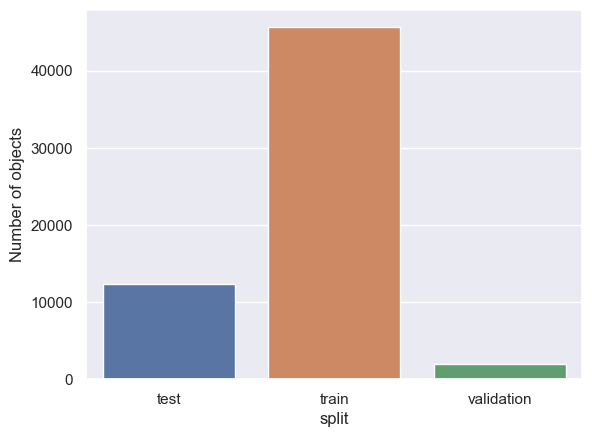

In [24]:
cnt = (
    tweets
    .value_counts('split')
    .sort_index()
    .to_frame()
    .reset_index()
)

sns.barplot(data=cnt, x='split', y=0)
plt.ylabel('Number of objects')
plt.show()

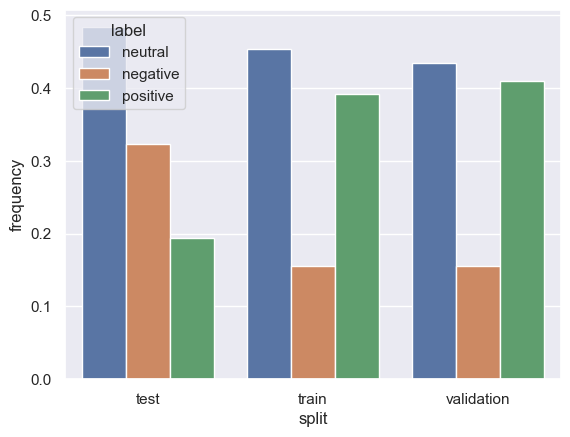

In [45]:
cnt_by_split = (
    tweets
    .groupby('split')
    ['label']
    .value_counts(normalize=True)
    .to_frame()
    .rename({'label': 'frequency'}, axis=1)
    .reset_index()
)
sns.barplot(data=cnt_by_split, y='frequency', hue='label', x='split')
plt.show()

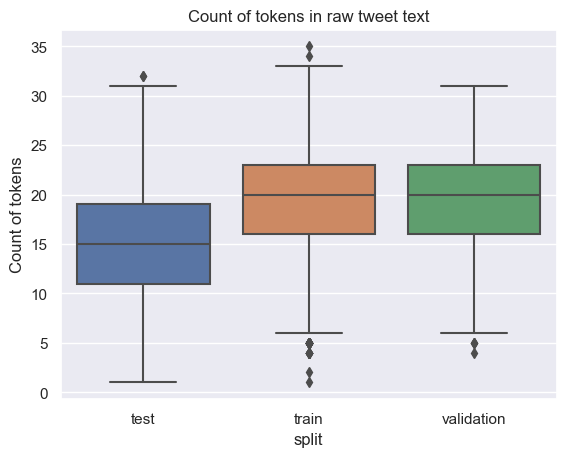

In [11]:
tweets['text_tokens_cnt'] = tweets['text'].str.split().apply(len)

sns.boxplot(data=tweets.sort_values('split'), x='split', y='text_tokens_cnt')
plt.title('Count of tokens in raw tweet text')
plt.ylabel('Count of tokens')
plt.show()

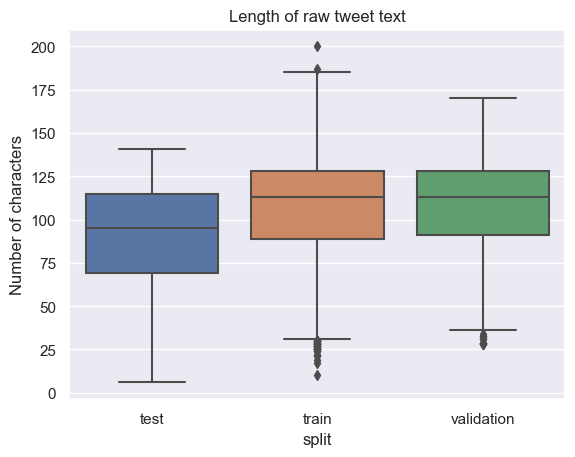

In [48]:
tweets['text_len'] = tweets['text'].apply(len)

sns.boxplot(data=tweets.sort_values('split'), x='split', y='text_len')
plt.title('Length of raw tweet text')
plt.ylabel('Number of characters')
plt.show()